### 주택건설기준 등에 관한 규정 제27조 제1항 제1호에 따라 주차대수 산정 기준
https://www.law.go.kr/LSW/lsInfoP.do?lsId=004948#J27:0 

1. 전용면적당 산정기준 - 전용면적을 기준으로 두 세대로 나누고 지역별 면적당 대수비율로 산정

2. 세대당 산정기준 - 전용면적(60)을 기준으로 두 세대로 나누고 60이상세대수X1 + 60미만세대수X0.7

지역에 따라 4가지로 나뉨

In [239]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

train = pd.read_csv("./train_final.csv", encoding="cp949")
test = pd.read_csv("./test_final.csv", encoding="cp949")

raw_train = pd.read_csv("./train_final.csv", encoding="cp949")
raw_test = pd.read_csv("./test_final.csv", encoding="cp949")

In [240]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   단지코드                2869 non-null   object 
 1   총세대수                2869 non-null   int64  
 2   임대건물구분              2869 non-null   object 
 3   지역                  2869 non-null   object 
 4   공급유형                2869 non-null   object 
 5   전용면적                2869 non-null   float64
 6   전용면적별세대수            2869 non-null   int64  
 7   공가수                 2869 non-null   int64  
 8   자격유형                2869 non-null   object 
 9   임대보증금               2869 non-null   int64  
 10  임대료                 2869 non-null   int64  
 11  지하철유무               2869 non-null   int64  
 12  도보 10분거리 내 버스정류장 수  2869 non-null   int64  
 13  단지내주차면수             2869 non-null   int64  
 14  등록차량수               2869 non-null   int64  
 15  전용면적별세대수합           2869 non-null   int64  
 16  인구수   

In [241]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   단지코드                1022 non-null   object 
 1   총세대수                1022 non-null   int64  
 2   임대건물구분              1022 non-null   object 
 3   지역                  1022 non-null   object 
 4   공급유형                1022 non-null   object 
 5   전용면적                1022 non-null   float64
 6   전용면적별세대수            1022 non-null   int64  
 7   공가수                 1022 non-null   int64  
 8   자격유형                1022 non-null   object 
 9   임대보증금               1022 non-null   int64  
 10  임대료                 1022 non-null   int64  
 11  지하철유무               1022 non-null   int64  
 12  도보 10분거리 내 버스정류장 수  1022 non-null   float64
 13  단지내주차면수             1022 non-null   int64  
 14  전용면적별세대수합           1022 non-null   int64  
 15  인구수                 1022 non-null   int64  
 16  차량보유인구

In [242]:
#한글깨짐
import matplotlib 
matplotlib.rc('font', family='Malgun Gothic')
# 그래프에 마이너스 표시가 되도록 변경 
matplotlib.rcParams['axes.unicode_minus'] = False

In [243]:
train['면적당보증금']=train['임대보증금']/train['전용면적']
train['면적당임대료']=train['임대료']/train['전용면적']

test['면적당보증금']=test['임대보증금']/test['전용면적']
test['면적당임대료']=test['임대료']/test['전용면적']

In [244]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철유무', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '전용면적별세대수합', '인구수', '차량보유인구', '미성년자', '고령자', '건물가치', '면적당보증금',
       '면적당임대료'],
      dtype='object')

In [245]:
for i in range(len(train)) :
    if (train.iloc[i,2] == "아파트") :
        train.iloc[i,2] = 0
    else :
        train.iloc[i,2] = 1
        
for i in range(len(test)) :
    if (test.iloc[i,2] == "아파트") :
        test.iloc[i,2] = 0
    else :
        test.iloc[i,2] = 1

In [246]:
train = train.astype({'임대건물구분': 'int'})
test = test.astype({'임대건물구분': 'int'})

In [247]:
train['자격유형'].value_counts()

A    1729
D     569
H     155
J     103
C      95
I      49
E      37
L      33
K      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

## A,B의 자격유형을 가지면 그 코드 자격유형을 AB 이런식으로 바꾸기

In [248]:
train.replace(['A','D','H','J','C','I','E','L','K','N','B','G','F','M','O'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], inplace=True)
test.replace(['A','D','H','J','C','I','E','L','K','N','B','G','F','M','O'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], inplace=True)

In [249]:
train = train.astype({'자격유형': 'int'})
test = test.astype({'자격유형': 'int'})

In [250]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철유무', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '전용면적별세대수합', '인구수', '차량보유인구', '미성년자', '고령자', '건물가치', '면적당보증금',
       '면적당임대료'],
      dtype='object')

In [251]:
#지역, 총세대수

grouped = train.groupby(['단지코드', '지역'])

function_list = ['mean']

groupby_result = grouped['총세대수', '임대건물구분', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료', '지하철유무', 
                         '도보 10분거리 내 버스정류장 수', '단지내주차면수','등록차량수', '전용면적별세대수합', 
                         '인구수', '차량보유인구', '미성년자', '고령자', '건물가치', '면적당보증금', '면적당임대료'].agg('mean')

groupby_result.head(10)


grouped1 = test.groupby(['단지코드', '지역'])

function_list = ['mean']

groupby_result1 = grouped1['총세대수', '임대건물구분', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료', '지하철유무', 
                         '도보 10분거리 내 버스정류장 수', '단지내주차면수', '전용면적별세대수합', 
                         '인구수', '차량보유인구', '미성년자', '고령자', '건물가치', '면적당보증금', '면적당임대료'].agg('mean')

# grouped = train.groupby(['단지코드', '임대건물구분', '공급유형', '자격유형'])

# function_list = ['mean']

# groupby_result = grouped['전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철유무', 
#                          '도보 10분거리 내 버스정류장 수', '단지내주차면수','등록차량수', '전용면적별세대수합', 
#                          '인구수', '차량보유인구', '미성년자', '고령자', '건물가치', '면적당보증금', '면적당임대료'].agg('mean')


<ipython-input-251-c21eb4065890>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_result = grouped['총세대수', '임대건물구분', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료', '지하철유무',
<ipython-input-251-c21eb4065890>:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_result1 = grouped1['총세대수', '임대건물구분', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료', '지하철유무',


In [252]:
# pd.DataFrame(groupby_result.reset_index)
train = groupby_result.reset_index()
test = groupby_result1.reset_index()

In [253]:
train

,단지코드,지역,총세대수,임대건물구분,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,단지내주차면수,등록차량수,전용면적별세대수합,인구수,차량보유인구,미성년자,고령자,건물가치,면적당보증금,면적당임대료
0,C1000,충청북도,566.0,0.000000,45.218571,80.857143,10.0,1.000000,1.320357e+07,121064.285714,...,438.0,481.0,140.714286,1597179.0,6.862816e+05,3.056918e+05,1.842245e+05,9.619779e+08,290441.338901,2653.911427
1,C1004,충청남도,521.0,0.894737,39.136842,27.421053,3.0,2.315789,1.757163e+07,118727.157895,...,153.0,93.0,28.157895,2118183.0,9.174756e+05,3.909719e+05,2.408617e+05,1.419117e+08,678864.538057,4481.778026
2,C1005,충청남도,1144.0,0.000000,54.360000,381.333333,16.0,1.000000,1.710767e+07,222046.666667,...,950.0,376.0,381.333333,2118183.0,9.174756e+05,3.909719e+05,2.408617e+05,6.413307e+09,314710.055884,4082.026460
3,C1013,광주광역시,1308.0,0.000000,46.142000,261.600000,16.0,1.000000,2.492480e+07,134726.000000,...,1119.0,1665.0,377.600000,1441970.0,6.313813e+05,2.403253e+05,1.845719e+05,6.495763e+09,538872.570220,2912.360394
4,C1014,전라북도,996.0,0.000000,49.232857,142.285714,5.0,1.000000,2.389400e+07,160488.571429,...,823.0,708.0,165.142857,1792476.0,7.135172e+05,3.171240e+05,2.576780e+05,2.507266e+09,473984.047603,3307.937931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,C2663,경기도,772.0,0.000000,41.005000,128.666667,14.0,3.000000,3.025867e+07,269070.000000,...,700.0,652.0,182.000000,13530519.0,6.018395e+06,2.490595e+06,1.624917e+06,4.069709e+09,706899.191558,6540.658287
407,C2666,부산광역시,1084.0,0.000000,43.258333,180.666667,23.0,1.000000,1.889050e+07,133145.000000,...,837.0,701.0,303.000000,3359527.0,1.244336e+06,3.801059e+05,7.083448e+05,3.473574e+09,435432.733740,3064.166768
408,C2670,전라북도,648.0,0.000000,40.918000,129.600000,9.0,1.000000,1.635000e+07,115188.000000,...,600.0,435.0,163.200000,1792476.0,7.135172e+05,3.171240e+05,2.576780e+05,2.104699e+09,391268.839388,2810.026512
409,C2680,경상남도,758.0,0.000000,43.350000,252.666667,19.0,1.000000,2.360633e+07,129816.666667,...,564.0,590.0,343.333333,3322373.0,1.389076e+06,5.419704e+05,4.201941e+05,5.570978e+09,545113.847426,2972.892493


In [254]:
data['단지코드'].value_counts() == 3

C2390    False
C2340    False
C2479    False
C2100    False
C2316    False
         ...  
C1968    False
C1722    False
C1386    False
C2326    False
C1699    False
Name: 단지코드, Length: 411, dtype: bool

In [255]:
# 지역 더미화 
gy1=pd.get_dummies(train['지역'])
gy2=pd.get_dummies(test['지역'])

train=pd.concat([train,gy1],axis=1)
test=pd.concat([test,gy2],axis=1)

test['서울특별시']=0

In [256]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   단지코드                150 non-null    object 
 1   지역                  150 non-null    object 
 2   총세대수                150 non-null    float64
 3   임대건물구분              150 non-null    float64
 4   전용면적                150 non-null    float64
 5   전용면적별세대수            150 non-null    float64
 6   공가수                 150 non-null    float64
 7   자격유형                150 non-null    float64
 8   임대보증금               150 non-null    float64
 9   임대료                 150 non-null    float64
 10  지하철유무               150 non-null    float64
 11  도보 10분거리 내 버스정류장 수  150 non-null    float64
 12  단지내주차면수             150 non-null    float64
 13  전용면적별세대수합           150 non-null    float64
 14  인구수                 150 non-null    float64
 15  차량보유인구              150 non-null    float64
 16  미성년자    

## 방법

In [257]:
for i in range(len(train)) :
    if (train.iloc[i,3] != 0) &  (train.iloc[i,3] != 1) :
        train.iloc[i,3] = 2
        
for i in range(len(test)) :
    if (test.iloc[i,3] != 0) &  (test.iloc[i,3] != 1) :
        test.iloc[i,3] = 2

In [258]:
train["임대건물구분"].value_counts()

0.0    378
2.0     33
Name: 임대건물구분, dtype: int64

In [259]:
train = train.astype({'임대건물구분': 'uint8'})
test = test.astype({'임대건물구분': 'uint8'})

In [260]:
raw_train.groupby(['단지코드']).nunique()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,지하철유무,도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,전용면적별세대수합,인구수,차량보유인구,미성년자,고령자,건물가치
단지코드,,,,,,,,,,,,,,,,,,,,,
C1000,1,1,1,1,1,5,6,1,1,3,...,1,1,1,1,3,1,1,1,1,6
C1004,1,1,2,1,2,15,3,1,2,3,...,1,1,1,1,5,1,1,1,1,3
C1005,1,1,1,1,1,3,3,1,1,3,...,1,1,1,1,3,1,1,1,1,3
C1013,1,1,1,1,1,4,5,1,1,3,...,1,1,1,1,4,1,1,1,1,5
C1014,1,1,1,1,1,6,7,1,1,4,...,1,1,1,1,6,1,1,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2663,1,1,1,1,1,5,6,1,1,4,...,1,1,1,1,5,1,1,1,1,6
C2666,1,1,1,1,1,4,6,1,1,2,...,1,1,1,1,4,1,1,1,1,6
C2670,1,1,1,1,1,4,3,1,1,3,...,1,1,1,1,3,1,1,1,1,4


In [261]:
raw_train.groupby(['단지코드']).nunique().iloc[:,8].value_counts()

1    337
2     61
3     13
Name: 자격유형, dtype: int64

In [262]:
raw_train.groupby(['단지코드']).nunique().iloc[:,4].value_counts()

1    353
2     52
3      6
Name: 공급유형, dtype: int64

### 공급유형이랑 자격유형 비슷 -> 하나만 선택 제안

In [264]:
# train.replace(['A','D','H','J','C','I','E','L','K','N','B','G','F','M','O'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], inplace=True)

예를들어 1이랑 5가 합쳐져서 평균이 2일수 있음.............................

In [265]:
for i in range(len(train)) :
    if (train.iloc[i,7] > 1) &  (train.iloc[i,7] < 2) :
        train.iloc[i,7] = 16
    elif (train.iloc[i,7] > 2) &  (train.iloc[i,7] < 3) :
        train.iloc[i,7] = 17
    elif (train.iloc[i,7] > 3) &  (train.iloc[i,7] < 4) :
        train.iloc[i,7] = 18
    elif (train.iloc[i,7] > 4) &  (train.iloc[i,7] < 5) :
        train.iloc[i,7] = 19
    elif (train.iloc[i,7] > 5) &  (train.iloc[i,7] < 6) :
        train.iloc[i,7] = 20
    elif (train.iloc[i,7] > 6) &  (train.iloc[i,7] < 7) :
        train.iloc[i,7] = 21
    elif (train.iloc[i,7] > 7) &  (train.iloc[i,7] < 8) :
        train.iloc[i,7] = 22
    elif (train.iloc[i,7] > 8) &  (train.iloc[i,7] < 9) :
        train.iloc[i,7] = 23
    elif (train.iloc[i,7] > 9) &  (train.iloc[i,7] < 10) :
        train.iloc[i,7] = 24
    elif (train.iloc[i,7] > 10) &  (train.iloc[i,7] < 11) :
        train.iloc[i,7] = 25
    elif (train.iloc[i,7] > 11) &  (train.iloc[i,7] < 12) :
        train.iloc[i,7] = 26
    elif (train.iloc[i,7] > 12) &  (train.iloc[i,7] < 13) :
        train.iloc[i,7] = 27
    elif (train.iloc[i,7] > 13) &  (train.iloc[i,7] < 14) :
        train.iloc[i,7] = 28
    elif (train.iloc[i,7] > 14) &  (train.iloc[i,7] < 15) :
        train.iloc[i,7] = 29

In [266]:
for i in range(len(test)) :
    if (test.iloc[i,7] > 1) &  (test.iloc[i,7] < 2) :
        test.iloc[i,7] = 16
    elif (test.iloc[i,7] > 2) &  (test.iloc[i,7] < 3) :
        test.iloc[i,7] = 17
    elif (test.iloc[i,7] > 3) &  (test.iloc[i,7] < 4) :
        test.iloc[i,7] = 18
    elif (test.iloc[i,7] > 4) &  (test.iloc[i,7] < 5) :
        test.iloc[i,7] = 19
    elif (test.iloc[i,7] > 5) &  (test.iloc[i,7] < 6) :
        test.iloc[i,7] = 20
    elif (test.iloc[i,7] > 6) &  (test.iloc[i,7] < 7) :
        test.iloc[i,7] = 21
    elif (test.iloc[i,7] > 7) &  (test.iloc[i,7] < 8) :
        test.iloc[i,7] = 22
    elif (test.iloc[i,7] > 8) &  (test.iloc[i,7] < 9) :
        test.iloc[i,7] = 23
    elif (test.iloc[i,7] > 9) &  (test.iloc[i,7] < 10) :
        test.iloc[i,7] = 24
    elif (test.iloc[i,7] > 10) &  (test.iloc[i,7] < 11) :
        test.iloc[i,7] = 25
    elif (test.iloc[i,7] > 11) &  (test.iloc[i,7] < 12) :
        test.iloc[i,7] = 26
    elif (test.iloc[i,7] > 12) &  (test.iloc[i,7] < 13) :
        test.iloc[i,7] = 27
    elif (test.iloc[i,7] > 13) &  (test.iloc[i,7] < 14) :
        test.iloc[i,7] = 28
    elif (test.iloc[i,7] > 14) &  (test.iloc[i,7] < 15) :
        test.iloc[i,7] = 29

In [267]:
train = train.astype({'자격유형': 'uint8'})
test = test.astype({'자격유형': 'uint8'})

In [268]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   단지코드                150 non-null    object 
 1   지역                  150 non-null    object 
 2   총세대수                150 non-null    float64
 3   임대건물구분              150 non-null    uint8  
 4   전용면적                150 non-null    float64
 5   전용면적별세대수            150 non-null    float64
 6   공가수                 150 non-null    float64
 7   자격유형                150 non-null    uint8  
 8   임대보증금               150 non-null    float64
 9   임대료                 150 non-null    float64
 10  지하철유무               150 non-null    float64
 11  도보 10분거리 내 버스정류장 수  150 non-null    float64
 12  단지내주차면수             150 non-null    float64
 13  전용면적별세대수합           150 non-null    float64
 14  인구수                 150 non-null    float64
 15  차량보유인구              150 non-null    float64
 16  미성년자    

In [269]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   단지코드                411 non-null    object 
 1   지역                  411 non-null    object 
 2   총세대수                411 non-null    float64
 3   임대건물구분              411 non-null    uint8  
 4   전용면적                411 non-null    float64
 5   전용면적별세대수            411 non-null    float64
 6   공가수                 411 non-null    float64
 7   자격유형                411 non-null    uint8  
 8   임대보증금               411 non-null    float64
 9   임대료                 411 non-null    float64
 10  지하철유무               411 non-null    float64
 11  도보 10분거리 내 버스정류장 수  411 non-null    float64
 12  단지내주차면수             411 non-null    float64
 13  등록차량수               411 non-null    float64
 14  전용면적별세대수합           411 non-null    float64
 15  인구수                 411 non-null    float64
 16  차량보유인구  

In [270]:
train = train.drop(["단지코드","지역"], axis = 1)
test = test.drop(["단지코드","지역"], axis = 1)

## 방법이 괜찮다면, 공급유형도 다음과 같은 방법으로 처리

Training score:  0.9996778974960837
MSE: 27765.19
RMSE: 166.63


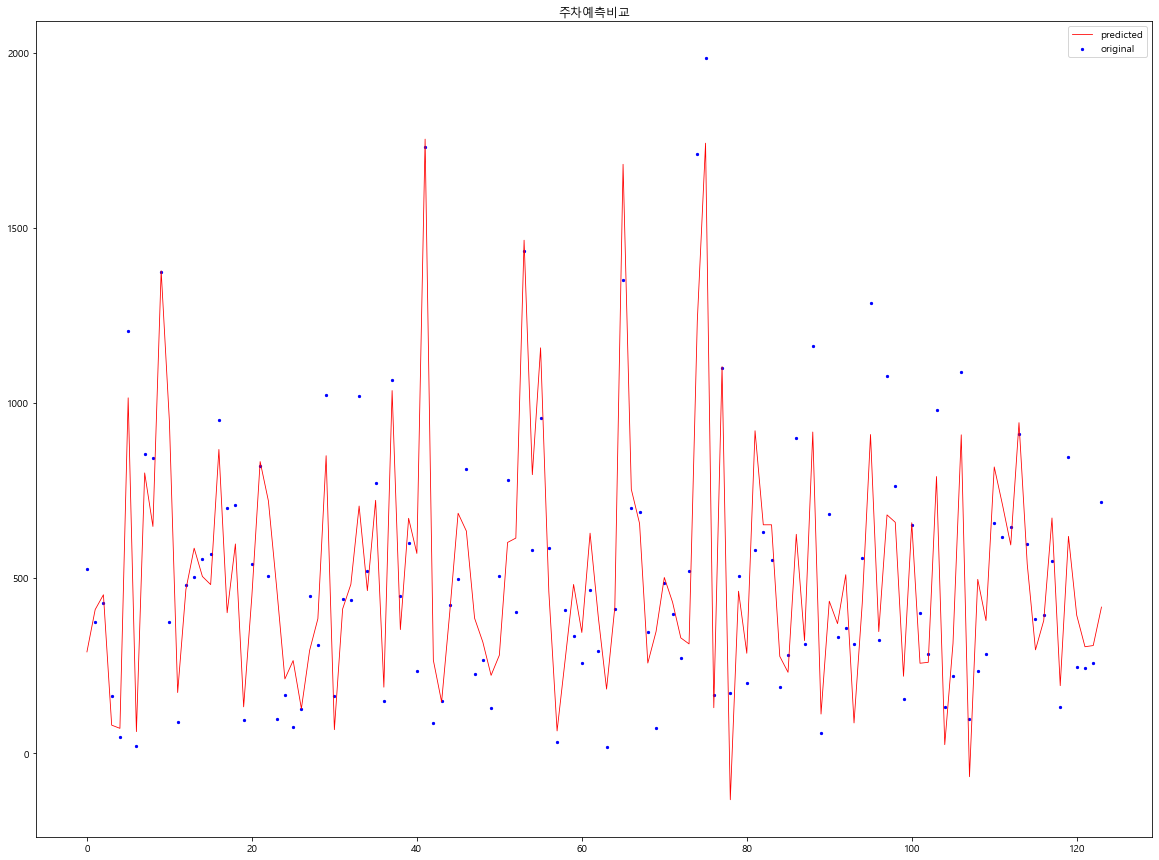

In [275]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance, plot_tree

x = train.drop(["등록차량수"], axis = 1)
y = train[["등록차량수"]]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

xgbr = xgb.XGBRegressor(base_score=0.5, 
#                         booster='gbtree', 
#                         colsample_bylevel=1,
#                         colsample_bynode=1, 
#                         colsample_bytree=1, 
                         gamma=0.1,
#                         importance_type='gain', 
#                         learning_rate=0.1, 
#                         max_delta_step=0,
                         max_depth=3, 
#                         min_child_weight=1, 
#                         missing=None, 
                         n_estimators=150,
#                         n_jobs=1, 
#                         nthread=None, 
#                         objective='reg:linear', 
#                         random_state=0,
                         reg_alpha=0.01, 
                         reg_lambda=0.3, 
#                         scale_pos_weight=1, 
#                         seed=None,
#                         silent=None, 
#                         subsample=1, 
                        verbosity=0)


xgbr.fit(xtrain, ytrain)
 
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
# scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
# print("Mean cross-validation score: %.2f" % scores.mean())

# kfold = KFold(n_splits=10, shuffle=True)
# kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
# print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

x_ax = range(len(ytest))
plt.figure(figsize=(20, 15))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.title("주차예측비교")
plt.legend()
plt.show()

In [276]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(ytest, ypred) 
r2 = r2_score(ytest, ypred) 
print("MSE : {0:.3f}".format(mse)) 
print("RMSE : {0:.3f}".format(np.sqrt(mse))) 
print("r2 : {0:.3f}".format(r2)) 


MSE : 27765.193
RMSE : 166.629
r2 : 0.810


In [277]:
#중요변수 시각화

fscore = xgbr.get_booster().get_fscore()
fscore

{'단지내주차면수': 78,
 '전용면적': 72,
 '공가수': 53,
 '임대료': 72,
 '건물가치': 78,
 '지하철유무': 9,
 '면적당임대료': 47,
 '전용면적별세대수합': 53,
 '총세대수': 142,
 '임대보증금': 58,
 '차량보유인구': 5,
 '부산광역시': 3,
 '전용면적별세대수': 81,
 '면적당보증금': 90,
 '경상북도': 2,
 '도보 10분거리 내 버스정류장 수': 44,
 '대구광역시': 2,
 '고령자': 4,
 '미성년자': 8,
 '인구수': 22,
 '광주광역시': 5,
 '강원도': 6,
 '임대건물구분': 3,
 '자격유형': 7,
 '제주특별자치도': 4,
 '대전광역시': 3,
 '충청북도': 3,
 '경상남도': 2,
 '충청남도': 1}

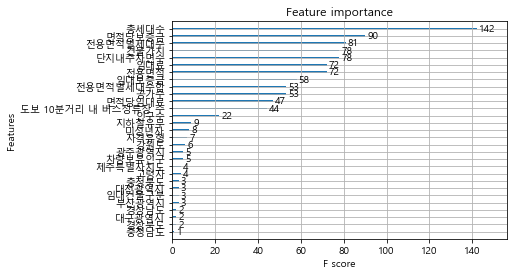

In [278]:
plot_importance(xgbr)

 '단지내주차면수': 78,
 '전용면적': 72,
 '공가수': 53,
 '임대료': 72,
 '건물가치': 78,
 '면적당임대료': 47,
 '전용면적별세대수합': 53,
 '총세대수': 142,
 '임대보증금': 58,
 '전용면적별세대수': 81,
 '면적당보증금': 90,
 '도보 10분거리 내 버스정류장 수': 44,
 '인구수': 22

In [287]:
train_중요 = train[['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', 
                  '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수', '전용면적별세대수합', '인구수' , '건물가치', '면적당보증금', '면적당임대료']]

In [288]:
test_중요 = test[['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', 
                 '도보 10분거리 내 버스정류장 수', '단지내주차면수', '전용면적별세대수합', '인구수', '건물가치', '면적당보증금', '면적당임대료']]

In [289]:
# train모두 사용해서 피팅하고 test예측하기

from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance, plot_tree

# x = train.drop(["등록차량수"], axis = 1)
# y = train[["등록차량수"]]
xtrain = train_중요.drop(["등록차량수"], axis = 1)
ytrain = train_중요[["등록차량수"]]

xtest = test_중요



xgbr = xgb.XGBRegressor(base_score=0.5, 
#                         booster='gbtree', 
#                         colsample_bylevel=1,
#                         colsample_bynode=1, 
#                         colsample_bytree=1, 
                         gamma=0.1,
#                         importance_type='gain', 
#                         learning_rate=0.1, 
#                         max_delta_step=0,
                         max_depth=3, 
#                         min_child_weight=1, 
#                         missing=None, 
                         n_estimators=150,
#                         n_jobs=1, 
#                         nthread=None, 
#                         objective='reg:linear', 
#                         random_state=0,
                         reg_alpha=0.01, 
                         reg_lambda=0.3, 
#                         scale_pos_weight=1, 
#                         seed=None,
#                         silent=None, 
#                         subsample=1, 
                        verbosity=0)


xgbr.fit(xtrain, ytrain)
 
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
# scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
# print("Mean cross-validation score: %.2f" % scores.mean())

# kfold = KFold(n_splits=10, shuffle=True)
# kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
# print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)

Training score:  0.9987196978324361


In [291]:
ypred

array([ 240.25233 ,  194.84705 ,  794.4721  ,  357.88947 ,   74.48217 ,
        380.50253 ,  436.0194  ,  653.8427  ,  593.68256 ,  467.55627 ,
        812.23395 ,  442.17166 ,  843.69    , 1418.983   ,  241.2571  ,
        747.0499  ,  596.4143  ,  919.65295 ,  331.8532  ,  401.8148  ,
        255.67175 ,  549.2714  ,  228.9562  ,  277.0335  ,  324.35098 ,
        326.33044 ,  923.1731  ,  817.4167  ,  505.209   ,  325.2406  ,
        624.7106  ,  336.38757 ,  676.1405  ,  346.86377 ,  139.32578 ,
        224.42627 ,  413.9152  ,   22.925043, 1374.8782  ,  235.81851 ,
        299.1819  ,  603.6647  ,  495.34314 ,  898.5748  ,  559.7656  ,
        600.3294  ,  433.89212 ,  -40.83284 ,  865.71277 ,  929.47906 ,
        725.47253 ,  681.9241  ,  623.04987 , 1735.6917  ,  279.80087 ,
        712.5207  ,  292.70193 ,  370.98718 ,  323.33417 ,  487.6802  ,
       1003.8174  ,  643.3372  ,  296.3498  ,  112.014435,   74.51829 ,
        482.37283 ,  525.80774 ,  183.4151  ,  916.8755  ,  285.

In [290]:
len(ypred)

150

## 데이콘 제출

In [292]:
submission=pd.read_csv("./sample_submission.csv")

In [293]:
submission['num'] = ypred
submission.to_csv('./submission.csv', index=False)

In [294]:
sub=pd.read_csv("./submission.csv")

In [295]:
sub

,code,num
0,C1072,240.25233
1,C1128,194.84705
2,C1456,794.47210
3,C1840,357.88947
4,C1332,74.48217
...,...,...
145,C2456,831.31020
146,C1266,876.17566
147,C2152,210.43655
148,C1267,86.10718
